# Stock Trading Project 

# Section 1

In [ ]:
!pip install pandas
!pip install yfinance
!pip install yahoofinancials
!pip install mpld3

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from yahoofinancials import YahooFinancials
%matplotlib inline
import mpld3
mpld3.enable_notebook()
from sklearn.model_selection import train_test_split

### F&C Investment Trust PLC (FCT.NZ)

In [249]:
stock_df = yf.download('FCT.NZ')
stock_df.rename(columns={'Adj Close': 'Adj_Close'}, inplace=True)

[*********************100%%**********************]  1 of 1 completed


In [250]:
print(stock_df.head)

<bound method NDFrame.head of                  Open       High        Low      Close  Adj_Close  Volume
Date                                                                     
2000-01-03   7.750000   7.750000   7.750000   7.750000   5.523126       0
2000-01-04   7.750000   7.750000   7.750000   7.750000   5.523126       0
2000-01-05   7.650000   7.650000   7.650000   7.650000   5.451860    2663
2000-01-06   7.650000   7.650000   7.650000   7.650000   5.451860       0
2000-01-07   7.650000   7.650000   7.650000   7.650000   5.451860       0
...               ...        ...        ...        ...        ...     ...
2023-11-09  18.260000  18.260000  18.260000  18.260000  18.260000      35
2023-11-13  18.450001  18.450001  18.450001  18.450001  18.450001     105
2023-11-14  18.770000  18.770000  18.770000  18.770000  18.770000    2580
2023-11-16  18.770000  18.770000  18.770000  18.770000  18.770000    2005
2023-11-23  18.660000  18.660000  18.660000  18.660000  18.660000    1519

[4954 r

Note that rows with missing Close values were automatically deleted.

In [251]:
stock_df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj_Close    float64
Volume         int64
dtype: object

In [252]:
train_df, test_df = train_test_split(stock_df, test_size=0.1, shuffle=False) # Split train and test sets, 90% - 10%
df=train_df
print(df.head)

<bound method NDFrame.head of              Open   High    Low  Close  Adj_Close  Volume
Date                                                     
2000-01-03   7.75   7.75   7.75   7.75   5.523126       0
2000-01-04   7.75   7.75   7.75   7.75   5.523126       0
2000-01-05   7.65   7.65   7.65   7.65   5.451860    2663
2000-01-06   7.65   7.65   7.65   7.65   5.451860       0
2000-01-07   7.65   7.65   7.65   7.65   5.451860       0
...           ...    ...    ...    ...        ...     ...
2020-12-04  14.51  14.52  14.51  14.52  14.299597    1554
2020-12-07  14.70  14.70  14.70  14.70  14.476863      45
2020-12-09  14.81  14.81  14.81  14.81  14.585195     154
2020-12-10  14.84  14.84  14.83  14.83  14.604890    1454
2020-12-14  14.90  14.90  14.90  14.90  14.673828     138

[4458 rows x 6 columns]>


<Axes: title={'center': "F&C's price"}, xlabel='Date'>

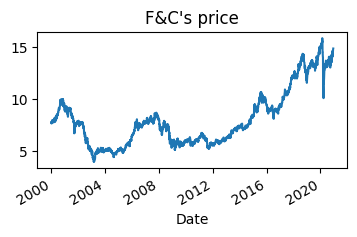

In [254]:
figure(figsize=(4, 2))
df['Close'].plot(title="F&C's price")

### Fast & Slow SMAs

Trial and error was used to find a suitable fast & slow SMA. The fast & slow SMAs that were decided upon are the 70-day fast SMA and 100-day slow SMA.

In [255]:
# create 70-day simple moving average column
df['Fast_SMA'] = df['Close'].rolling(window = 70, min_periods = 1).mean()
# create 100-day simple moving average column
df['Slow_SMA'] = df['Close'].rolling(window = 100, min_periods = 1).mean()

df.head(3)

Open  High   Low  Close  Adj_Close  Volume  Fast_SMA  Slow_SMA
Date                                                                      
2000-01-03  7.75  7.75  7.75   7.75   5.523126       0  7.750000  7.750000
2000-01-04  7.75  7.75  7.75   7.75   5.523126       0  7.750000  7.750000
2000-01-05  7.65  7.65  7.65   7.65   5.451860    2663  7.716667  7.716667

### Signals & Positions

In [256]:
df['Signal'] = 0.0
df['Signal'] = np.where(df['Fast_SMA'] > df['Slow_SMA'], 1.0, 0.0)

In [257]:
df['Position'] = df['Signal'].diff()
# Need to set the first row of Position to 0. Otherwise it is nan from diff function.
df['Position'].iloc[0]=0

df.head()

<ipython-input-257-8ff213d9abb6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Position'].iloc[0]=0


Open  High   Low  Close  Adj_Close  Volume  Fast_SMA  Slow_SMA  \
Date                                                                         
2000-01-03  7.75  7.75  7.75   7.75   5.523126       0  7.750000  7.750000   
2000-01-04  7.75  7.75  7.75   7.75   5.523126       0  7.750000  7.750000   
2000-01-05  7.65  7.65  7.65   7.65   5.451860    2663  7.716667  7.716667   
2000-01-06  7.65  7.65  7.65   7.65   5.451860       0  7.700000  7.700000   
2000-01-07  7.65  7.65  7.65   7.65   5.451860       0  7.690000  7.690000   

            Signal  Position  
Date                          
2000-01-03     0.0       0.0  
2000-01-04     0.0       0.0  
2000-01-05     0.0       0.0  
2000-01-06     0.0       0.0  
2000-01-07     0.0       0.0

<Axes: xlabel='Date'>

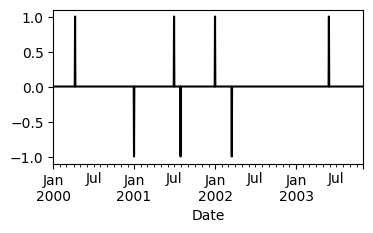

In [258]:
# Plot the positions
plt.figure(figsize = (4,2))
df.iloc[0:1000]['Position'].plot(color = 'k', label= 'Position')

### Trade Signals & Profits

0.0


<Axes: xlabel='Date'>

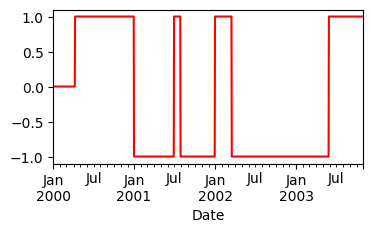

In [259]:
plt.figure(figsize = (4,2))
df['Trade'] = df['Position']
prevrow = df.iloc[0]
print(prevrow['Position'])
for index, row in df.iloc[1:].iterrows():
  if row['Trade']==0:
    if prevrow['Trade']!=0:
      df.at[index,'Trade']=prevrow['Trade']
      row['Trade']=prevrow['Trade']
  prevrow=row
df.iloc[0:1000]['Trade'].plot(color = 'r', label= 'Trade')

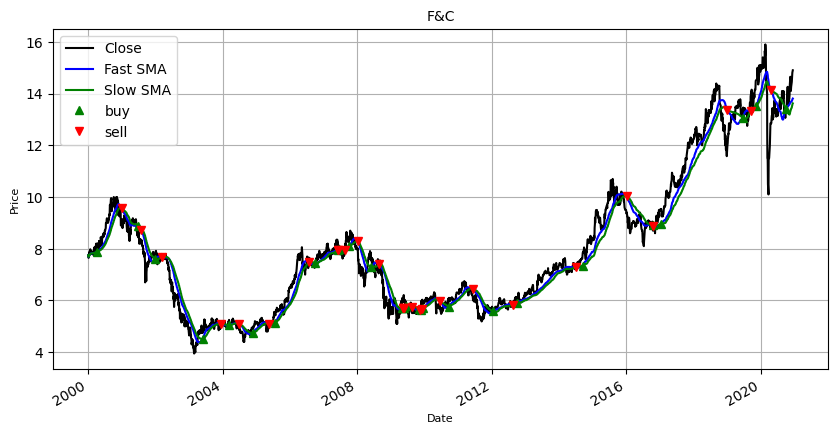

In [360]:
# plot close price, fast and slow SMAs, buy/ sell signals
def plotprice(df):
  plt.figure(figsize = (10,5))
  df['Close'].plot(color = 'k', label= 'Close')
  df['Fast_SMA'].plot(color = 'b', label = 'Fast SMA')
  df['Slow_SMA'].plot(color = 'g', label = 'Slow SMA')
  # plot buy signals
  plt.plot(df[df['Position'] == 1].index, df['Fast_SMA'][df['Position'] == 1], '^', markersize = 6, color = 'g', label = 'buy')
  # plot sell signals
  plt.plot(df[df['Position'] == -1].index, df['Fast_SMA'][df['Position'] == -1], 'v', markersize = 6, color = 'r', label = 'sell')
  plt.ylabel('Price', fontsize = 8 )
  plt.xlabel('Date', fontsize = 8 )
  plt.title('F&C', fontsize = 10)
  plt.legend()
  plt.grid()
  plt.show()

plotprice(df)

In [261]:
df.head(3)

Open  High   Low  Close  Adj_Close  Volume  Fast_SMA  Slow_SMA  \
Date                                                                         
2000-01-03  7.75  7.75  7.75   7.75   5.523126       0  7.750000  7.750000   
2000-01-04  7.75  7.75  7.75   7.75   5.523126       0  7.750000  7.750000   
2000-01-05  7.65  7.65  7.65   7.65   5.451860    2663  7.716667  7.716667   

            Signal  Position  Trade  
Date                                 
2000-01-03     0.0       0.0    0.0  
2000-01-04     0.0       0.0    0.0  
2000-01-05     0.0       0.0    0.0

0.0


<Axes: xlabel='Date'>

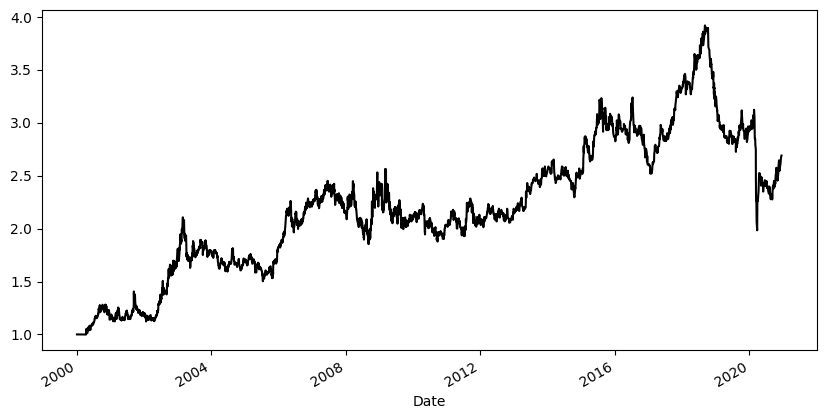

In [262]:
df['Returns']=1.0
print(df.iloc[1]['Trade'])

def computereturns(tdf,trate):
  prevrow = tdf.iloc[0]
  returncol=tdf.columns.get_loc('Returns')
  for i in range(len(tdf)):
    if i==0:
      prev_i=i
    else:
      prevrow=tdf.iloc[prev_i]
      row=tdf.iloc[i]
      rt=(row['Close']/prevrow['Close'])-1
      t=prevrow['Returns']*(1+prevrow['Trade']*rt)*(1-trate*abs(row['Trade']-prevrow['Trade']))
      tdf.iat[i,returncol]=t
      prev_i=i
  return tdf

df=computereturns(df,0.001)
plt.figure(figsize = (10,5))
#df.iloc[1:1000]['Returns'].plot(color = 'k', label= 'Returns')
df['Returns'].plot(color = 'k', label= 'Returns')

In [263]:
print("Final portfolio return on TRAIN set:")
print(df["Returns"].tail(1))

Final portfolio return on TRAIN set:
Date
2020-12-14    2.690378
Name: Returns, dtype: float64


### Parameter Optimisation - takes about 20 mins to run

In [ ]:
best_profit = -np.inf
best_parameters = {}

# Define the range of values for fast SMA, slow SMA, and transaction rate
fast_sma_range = range(50, 101, 5)
slow_sma_range = range(180, 281, 10)
trate_range = np.arange(0.001, 0.011, 0.001)

# Iterate over all possible combinations
for fast_sma in fast_sma_range:
    for slow_sma in slow_sma_range:
        for trate in trate_range:
            # Calculate fast and slow SMAs
            df['Fast_SMA'] = df['Close'].rolling(window=fast_sma, min_periods=1).mean()
            df['Slow_SMA'] = df['Close'].rolling(window=slow_sma, min_periods=1).mean()

            # Generate trading signals based on the current parameters
            df['Position'] = 0.0
            df.loc[df['Fast_SMA'] > df['Slow_SMA'] * (1 + 0.01), 'Position'] = 1.0
            df.loc[df['Fast_SMA'] < df['Slow_SMA'] * (1 - 0.01), 'Position'] = -1.0

            df['Signal'] = 0.0
            df['Signal'] = np.where(df['Fast_SMA'] > df['Slow_SMA'], 1.0, 0.0)

            df['Position'] = df['Signal'].diff()
            # Need to set the first row of Position to 0. Otherwise it is nan from diff function.
            df['Position'].iloc[0]=0

            df['Trade'] = df['Position']
            prevrow = df.iloc[0]
            for index, row in df.iloc[1:].iterrows():
              if row['Trade']==0:
                if prevrow['Trade']!=0:
                  df.at[index,'Trade']=prevrow['Trade']
                  row['Trade']=prevrow['Trade']
              prevrow=row

            df['Returns']=1.0

            # Compute portfolio returns
            df = computereturns(df, trate)

            # Evaluate the total profit on the training dataset
            total_profit = df['Returns'].iloc[-1]

            # Update the best parameters if the current combination yields a higher profit
            if total_profit > best_profit:
                best_profit = total_profit
                best_parameters = {'fast_sma': fast_sma, 'slow_sma': slow_sma, 'transaction_rate': trate}

# Print the best parameters and the corresponding profit on the training dataset
print("Best Parameters:", best_parameters)
print("Best Profit on Training Dataset:", best_profit)

# Section 2

### Literature Review on NeuroEvolution of Augmenting Topologies (NEAT) Model  

The NeuroEvolution of Augmenting Topologies (NEAT) model is a hybrid AI approach incorporating genetic algorithms with evolving artificial neural networks.

It was first introduced by Stanley and Miikkulainen in 2002 in the paper "Evolving Neural Networks through Augmenting Topologies". At time of publication, the model outperformed the best fixed-topology method on a challenging benchmark reinforcement learning task. NEAT evolves both the structure and weights of ANNs simultaneously, allowing for the automatic discovery of optimal network architectures. This hybridisation enables it to overcome challenges associated with fixed-topology neural networks, offering adaptive, dynamic solutions to complex problems. NEAT is also an important contribution to GAs because it shows how it is possible for evolution to both optimise and complexify solutions simultaneously, offering the possibility of evolving increasingly complex solutions over generations.

Over the years, there have been some advancements to the NEAT model. In 2015, Risi and Togelius applied this model to the gaming domain in their paper "Neuroevolution in Games: State of the Art and Open Challenges" where they applied neuroevolution to games by training ANNs through evolutionary algorithms. In 2017, Real et al. experimented with "Large-Scale Evolution of Image Classifiers", which is remaniscant of the NEAT model. They used evolutionary algorithms to automatically discover neural networks in the solution space. These applications underscore NEAT's versatility in addressing diverse problem domains.

In the domain of time series forecasting and trading, Mańdziuk and Rajkiewicz proposed a "Neuro-evolutionary system for FOREX trading" in 2016, applying evolutionary methods for selection of the most suitable neuro-genetic system. They investigated the way the evolutionary component of the system selects input variables in subsequent trading periods.  

Comparing NEAT with other time series methods, namely the statistical, linear ARIMA model, NEAT excels in capturing intricate, non-linear relationships that may be challenging for fixed-topology models. NEAT's versatility allows it to handle complex, non-linear relationships often inherent in temporal data, as well as work for forecasting tasks where the underlying patterns evolve over time.

### HYBRID MODEL: NEAT

The NEAT model uses a genetic algorithm to evolve neural network architectures. Through successive generations, the algorithm refines neural network structures, optimising them for accurate predictions. The model is trained on historical data, with each genome in the population representing a unique neural network configuration. The fitness of each genome is evaluated based on its ability to predict future stock prices. The winning genome represents the most effective neural network, which is then used to forecast stock prices on test data. The model's performance is assessed by comparing its predictions to actual stock prices using RMSE as a metric.

Mounting gdrive in order to import config file during NEAT model building later. Change the config_path in the subsequent chunk to your own directory to import the config file.

In [264]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [265]:
pip install neat-python

In [266]:
import neat
from sklearn.preprocessing import StandardScaler

Prepare the inputs for the model using a 30-day window for forecasting

In [267]:
def preprocess_data(scaled_data, window_size):
    x, y = [], []
    for i in range(len(scaled_data) - window_size):
        x.append(scaled_data[i:i + window_size, 0])
        y.append(scaled_data[i + window_size, 0])

    x, y = np.array(x), np.array(y)
    return x, y

# takes in and returns scaled data

Build NEAT model

In [268]:
def eval_genome(genomes, config):
    global x_train, y_train

    for genome_id, genome in genomes:
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        total_error = 0.0

        for i in range(len(x_train)):
            inputs = x_train[i]
            target = y_train[i]
            output = net.activate(inputs)
            total_error += abs(output[0] - target)

        # Assign the fitness value to the genome
        genome.fitness = total_error / len(x_train)


In [269]:
# Set up NEAT configuration
config_path = '/content/drive/My Drive/config.cfg'
config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                     neat.DefaultSpeciesSet, neat.DefaultStagnation, config_path)

In [270]:
window_size = 30

# Preprocess data
scaler = StandardScaler()
scaled_train = scaler.fit_transform(df["Close"].values.reshape(-1, 1))
scaled_test = scaler.fit_transform(test_df["Close"].values.reshape(-1, 1))

x_train, y_train = preprocess_data(scaled_train, window_size)
x_test, y_test = preprocess_data(scaled_test, window_size)

In [271]:
# Create a population
p = neat.Population(config)

# Add reporters for tracking progress
p.add_reporter(neat.StdOutReporter(True))
stats = neat.StatisticsReporter()
p.add_reporter(stats)

Takes 8 mins to run 100 generations

In [272]:
# Run the NEAT algorithm
num_generations = 100
winner = p.run(eval_genome, num_generations)

# Display the winning genome
print('\nBest genome:\n{!s}'.format(winner))


 ****** Running generation 0 ****** 

Population's average fitness: 0.76954 stdev: 0.00000
Best fitness: 0.76954 - size: (3, 0) - species 1 - id 1
Average adjusted fitness: 0.000
Mean genetic distance 1.077, standard deviation 0.305
Population of 100 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0   100      0.8    0.000     0
Total extinctions: 0
Generation time: 4.909 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.77254 stdev: 0.02495
Best fitness: 1.01488 - size: (3, 1) - species 1 - id 178
Average adjusted fitness: 0.003
Mean genetic distance 1.092, standard deviation 0.346
Population of 100 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1   100      0.8    0.003     0
Total extinctions: 0
Generation time: 2.501 sec (3.705 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.83503 stdev: 0.

In [273]:
# Evaluate the winning genome on test data
winner_net = neat.nn.FeedForwardNetwork.create(winner, config)
predictions = []

for i in range(len(x_test)):
    inputs = x_test[i]
    prediction = winner_net.activate(inputs)
    predictions.append(prediction[0])

In [274]:
# Inverse transform predictions to original scale
predicted_prices = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Compare predicted prices with actual prices
comparison_df = pd.DataFrame({'Actual': test_df['Close'][window_size:], 'Predicted': predicted_prices.flatten()})

In [277]:
print(comparison_df)

               Actual  Predicted
Date                            
2021-02-18  15.460000  38.428710
2021-02-19  15.170000  37.807653
2021-02-22  15.300000  38.173686
2021-02-23  15.160000  37.308068
2021-02-24  15.000000  37.417955
...               ...        ...
2023-11-09  18.260000  17.044617
2023-11-13  18.450001  17.044617
2023-11-14  18.770000  17.044617
2023-11-16  18.770000  17.044617
2023-11-23  18.660000  17.044617

[466 rows x 2 columns]


In [278]:
def calculate_rmse(y_true, y_pred):
    """
    Calculate the Root Mean Squared Error (RMSE)
    """
    rmse = np.sqrt(np.mean((y_true - y_pred) ** 2))
    return rmse

In [279]:
calculate_rmse(test_df['Close'][30:].values, predicted_prices)

7.5642177545759655

### TRADING WITH NEAT FORECAST

There are no forecasts for the first 30 rows of the test set because the first 30 days were used as input to forecast the 31st day of the test set.

Preprocess test set

<Axes: title={'center': "F&C's price"}, xlabel='Date'>

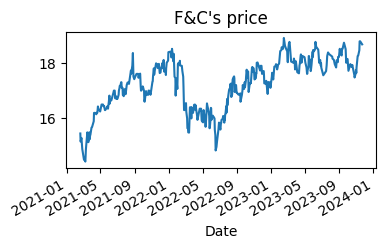

In [361]:
figure(figsize=(4, 2))
test_df['Close'].plot(title="F&C's price")

In [281]:
test_df

Open       High        Low      Close  Adj_Close  Volume
Date                                                                     
2020-12-15  14.500000  14.500000  14.500000  14.500000  14.279900    1526
2020-12-16  14.500000  14.500000  14.500000  14.500000  14.279900     436
2020-12-17  14.690000  14.900000  14.690000  14.900000  14.673828    6268
2020-12-18  14.900000  14.900000  14.900000  14.900000  14.673828     793
2020-12-21  14.800000  14.800000  14.800000  14.800000  14.575345      89
...               ...        ...        ...        ...        ...     ...
2023-11-09  18.260000  18.260000  18.260000  18.260000  18.260000      35
2023-11-13  18.450001  18.450001  18.450001  18.450001  18.450001     105
2023-11-14  18.770000  18.770000  18.770000  18.770000  18.770000    2580
2023-11-16  18.770000  18.770000  18.770000  18.770000  18.770000    2005
2023-11-23  18.660000  18.660000  18.660000  18.660000  18.660000    1519

[496 rows x 6 columns]

For the fast and slow SMA rolling window, here we will use 50-1=49 and 180-1=179 days instead, as we will later append the forecasted value as the final data point in the window, then find the mean.

In [282]:
# create 70 days simple moving average column
test_df['Fast_SMA'] = test_df['Close'].rolling(window = 69, min_periods = 1).mean()
# Create 100 days simple moving average column
test_df['Slow_SMA'] = test_df['Close'].rolling(window=99, min_periods=1).mean()
test_df

Open       High        Low      Close  Adj_Close  Volume  \
Date                                                                        
2020-12-15  14.500000  14.500000  14.500000  14.500000  14.279900    1526   
2020-12-16  14.500000  14.500000  14.500000  14.500000  14.279900     436   
2020-12-17  14.690000  14.900000  14.690000  14.900000  14.673828    6268   
2020-12-18  14.900000  14.900000  14.900000  14.900000  14.673828     793   
2020-12-21  14.800000  14.800000  14.800000  14.800000  14.575345      89   
...               ...        ...        ...        ...        ...     ...   
2023-11-09  18.260000  18.260000  18.260000  18.260000  18.260000      35   
2023-11-13  18.450001  18.450001  18.450001  18.450001  18.450001     105   
2023-11-14  18.770000  18.770000  18.770000  18.770000  18.770000    2580   
2023-11-16  18.770000  18.770000  18.770000  18.770000  18.770000    2005   
2023-11-23  18.660000  18.660000  18.660000  18.660000  18.660000    1519   

             Fast_SMA   Slow_SMA  
Date                              
2020-12-15  14.500000  14.500000  
2020-12-16  14.500000  14.500000  
2020-12-17  14.633333  14.633333  
2020-12-18  14.700000  14.700000  
2020-12-21  14.720000  14.720000  
...               ...        ...  
2023-11-09  18.119275  18.097778  
2023-11-13  18.122319  18.098283  
2023-11-14  18.130000  18.099091  
2023-11-16  18.142609  18.099293  
2023-11-23  18.150580  18.099091  

[496 rows x 8 columns]

In [283]:
# remove the first 30 rows because forecasts only start from the 31st row
ndf = test_df.iloc[30:]

In [284]:
# append NEAT forecasts
ndf['neat_forecasts'] = predicted_prices
ndf

<ipython-input-284-d32b19a89e78>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf['neat_forecasts'] = predicted_prices


Open       High        Low      Close  Adj_Close  Volume  \
Date                                                                        
2021-02-18  15.450000  15.460000  15.450000  15.460000  15.225328    3295   
2021-02-19  15.170000  15.170000  15.170000  15.170000  14.939730     405   
2021-02-22  15.300000  15.300000  15.300000  15.300000  15.067757     944   
2021-02-23  15.160000  15.160000  15.160000  15.160000  14.929881     503   
2021-02-24  15.000000  15.000000  15.000000  15.000000  14.772310     312   
...               ...        ...        ...        ...        ...     ...   
2023-11-09  18.260000  18.260000  18.260000  18.260000  18.260000      35   
2023-11-13  18.450001  18.450001  18.450001  18.450001  18.450001     105   
2023-11-14  18.770000  18.770000  18.770000  18.770000  18.770000    2580   
2023-11-16  18.770000  18.770000  18.770000  18.770000  18.770000    2005   
2023-11-23  18.660000  18.660000  18.660000  18.660000  18.660000    1519   

             Fast_SMA   Slow_SMA  neat_forecasts  
Date                                              
2021-02-18  15.058387  15.058387       38.428710  
2021-02-19  15.061875  15.061875       37.807653  
2021-02-22  15.069091  15.069091       38.173686  
2021-02-23  15.071765  15.071765       37.308068  
2021-02-24  15.069714  15.069714       37.417955  
...               ...        ...             ...  
2023-11-09  18.119275  18.097778       17.044617  
2023-11-13  18.122319  18.098283       17.044617  
2023-11-14  18.130000  18.099091       17.044617  
2023-11-16  18.142609  18.099293       17.044617  
2023-11-23  18.150580  18.099091       17.044617  

[466 rows x 9 columns]

Include the forecast as the final data point in the window to calculate the fast and slow SMAs.

In [285]:
ndf['Fast_SMA_withfc'] = ((ndf['Fast_SMA']*69) + ndf['neat_forecasts'])/70
ndf['Slow_SMA_withfc'] = ((ndf['Slow_SMA']*99) + ndf['neat_forecasts'])/100
ndf.head(3)

<ipython-input-285-8ce735ae8374>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf['Fast_SMA_withfc'] = ((ndf['Fast_SMA']*69) + ndf['neat_forecasts'])/70
<ipython-input-285-8ce735ae8374>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf['Slow_SMA_withfc'] = ((ndf['Slow_SMA']*99) + ndf['neat_forecasts'])/100


Open   High    Low  Close  Adj_Close  Volume   Fast_SMA  \
Date                                                                   
2021-02-18  15.45  15.46  15.45  15.46  15.225328    3295  15.058387   
2021-02-19  15.17  15.17  15.17  15.17  14.939730     405  15.061875   
2021-02-22  15.30  15.30  15.30  15.30  15.067757     944  15.069091   

             Slow_SMA  neat_forecasts  Fast_SMA_withfc  Slow_SMA_withfc  
Date                                                                     
2021-02-18  15.058387       38.428710        15.392249        15.292090  
2021-02-19  15.061875       37.807653        15.386815        15.289333  
2021-02-22  15.069091       38.173686        15.399157        15.300137

In [286]:
ndf['Signal'] = 0.0
ndf['Signal'] = np.where(ndf['Fast_SMA_withfc'] > ndf['Slow_SMA_withfc'], 1.0, 0.0)

ndf['Position'] = ndf['Signal'].diff()
# Need to set the first row of Position to 0. Otherwise it is nan from diff function.
ndf['Position'].iloc[0]=0

<ipython-input-286-d2ffbf9a82fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf['Signal'] = 0.0
<ipython-input-286-d2ffbf9a82fa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf['Signal'] = np.where(ndf['Fast_SMA_withfc'] > ndf['Slow_SMA_withfc'], 1.0, 0.0)
<ipython-input-286-d2ffbf9a82fa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

In [287]:
ndf[ndf['Position'] != 0.0]

Open       High        Low      Close  Adj_Close  Volume  \
Date                                                                        
2022-04-13  16.150000  16.150000  15.950000  15.950000  15.817888     321   
2022-08-24  17.389999  17.389999  16.950001  16.950001  16.809607   10829   
2023-09-07  18.370001  18.370001  18.370001  18.370001  18.370001    1999   
2023-11-03  17.830000  17.830000  17.830000  17.830000  17.830000     837   

             Fast_SMA   Slow_SMA  neat_forecasts  Fast_SMA_withfc  \
Date                                                                
2022-04-13  17.141884  17.188182       27.377600        17.288108   
2022-08-24  16.246232  16.251010       20.688901        16.309699   
2023-09-07  18.082609  18.088485       17.044617        18.067780   
2023-11-03  18.105942  18.097071       17.044617        18.090780   

            Slow_SMA_withfc  Signal  Position  
Date                                           
2022-04-13        17.290076     0.0      -1.0  
2022-08-24        16.295389     1.0       1.0  
2023-09-07        18.078046     0.0      -1.0  
2023-11-03        18.086546     1.0       1.0

<Axes: xlabel='Date'>

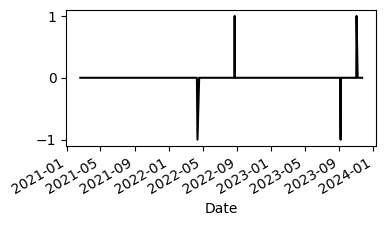

In [288]:
# Plot the positions
plt.figure(figsize = (4,2))
ndf.iloc[0:]['Position'].plot(color = 'k', label= 'Position')

<ipython-input-289-3de8102c91fa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf['Trade'] = ndf['Position']


0.0


<Axes: xlabel='Date'>

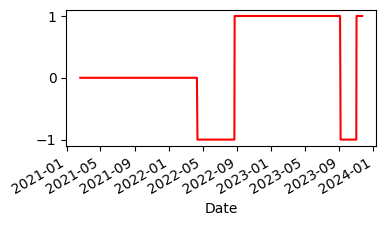

In [289]:
plt.figure(figsize = (4,2))
ndf['Trade'] = ndf['Position']
prevrow = ndf.iloc[0]
print(prevrow['Position'])
for index, row in ndf.iloc[1:].iterrows():
  if row['Trade']==0:
    if prevrow['Trade']!=0:
      ndf.at[index,'Trade']=prevrow['Trade']
      row['Trade']=prevrow['Trade']
  prevrow=row
ndf.iloc[0:]['Trade'].plot(color = 'r', label= 'Trade')

0.0


<ipython-input-290-c4fb108c016b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf['Returns']=1.0


<Axes: xlabel='Date'>

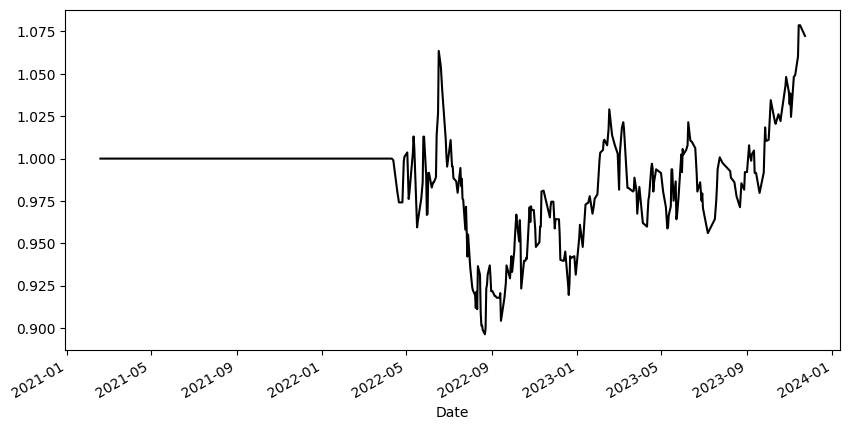

In [290]:
ndf['Returns']=1.0
print(ndf.iloc[1]['Trade'])

ndf=computereturns(ndf,0.001)
plt.figure(figsize = (10,5))
ndf['Returns'].plot(color = 'k', label= 'Returns')

In [291]:
print("Final portfolio return:")
print(ndf['Returns'].tail(1))

Final portfolio return:
Date
2023-11-23    1.072319
Name: Returns, dtype: float64


### ALTERNATIVE APPROACH TO TRADING WITH NEAT FORECAST

In this approach, rather than using the forecast values in the SMA rolling windows, we use a crossover strategy between the forecast values and fast SMA instead. To do this, we plot forecast values alongside the fast SMA . The intuition is that if the forecast is greater than the fast SMA, this indicates that prices are rising, hence this is a buy signal. If the forecast crosses below the fast SMA, this indicates that prices are falling, hence this is a sell signal. This alternative approach produces better returns than the original approach.

In [294]:
# Start with clean copy of test_df
train_df, test_df = train_test_split(stock_df, test_size=0.1, shuffle=False) # Split train and test sets, 90% - 10%
test_df

Open       High        Low      Close  Adj_Close  Volume
Date                                                                     
2020-12-15  14.500000  14.500000  14.500000  14.500000  14.279900    1526
2020-12-16  14.500000  14.500000  14.500000  14.500000  14.279900     436
2020-12-17  14.690000  14.900000  14.690000  14.900000  14.673828    6268
2020-12-18  14.900000  14.900000  14.900000  14.900000  14.673828     793
2020-12-21  14.800000  14.800000  14.800000  14.800000  14.575345      89
...               ...        ...        ...        ...        ...     ...
2023-11-09  18.260000  18.260000  18.260000  18.260000  18.260000      35
2023-11-13  18.450001  18.450001  18.450001  18.450001  18.450001     105
2023-11-14  18.770000  18.770000  18.770000  18.770000  18.770000    2580
2023-11-16  18.770000  18.770000  18.770000  18.770000  18.770000    2005
2023-11-23  18.660000  18.660000  18.660000  18.660000  18.660000    1519

[496 rows x 6 columns]

In [295]:
# create 70 days simple moving average column
test_df['Fast_SMA'] = test_df['Close'].rolling(window = 70, min_periods = 1).mean()
# Create 100 days simple moving average column
test_df['Slow_SMA'] = test_df['Close'].rolling(window=100, min_periods=1).mean()
test_df

Open       High        Low      Close  Adj_Close  Volume  \
Date                                                                        
2020-12-15  14.500000  14.500000  14.500000  14.500000  14.279900    1526   
2020-12-16  14.500000  14.500000  14.500000  14.500000  14.279900     436   
2020-12-17  14.690000  14.900000  14.690000  14.900000  14.673828    6268   
2020-12-18  14.900000  14.900000  14.900000  14.900000  14.673828     793   
2020-12-21  14.800000  14.800000  14.800000  14.800000  14.575345      89   
...               ...        ...        ...        ...        ...     ...   
2023-11-09  18.260000  18.260000  18.260000  18.260000  18.260000      35   
2023-11-13  18.450001  18.450001  18.450001  18.450001  18.450001     105   
2023-11-14  18.770000  18.770000  18.770000  18.770000  18.770000    2580   
2023-11-16  18.770000  18.770000  18.770000  18.770000  18.770000    2005   
2023-11-23  18.660000  18.660000  18.660000  18.660000  18.660000    1519   

             Fast_SMA   Slow_SMA  
Date                              
2020-12-15  14.500000  14.500000  
2020-12-16  14.500000  14.500000  
2020-12-17  14.633333  14.633333  
2020-12-18  14.700000  14.700000  
2020-12-21  14.720000  14.720000  
...               ...        ...  
2023-11-09  18.115286  18.097000  
2023-11-13  18.124000  18.101300  
2023-11-14  18.131571  18.105000  
2023-11-16  18.139143  18.105800  
2023-11-23  18.150000  18.104900  

[496 rows x 8 columns]

In [296]:
# remove the first 30 rows because forecasts only start from the 31st row
ndf2 = test_df.iloc[30:]
# append NEAT forecasts
ndf2['neat_forecasts'] = predicted_prices
ndf2

<ipython-input-296-13c9a0aee302>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf2['neat_forecasts'] = predicted_prices


Open       High        Low      Close  Adj_Close  Volume  \
Date                                                                        
2021-02-18  15.450000  15.460000  15.450000  15.460000  15.225328    3295   
2021-02-19  15.170000  15.170000  15.170000  15.170000  14.939730     405   
2021-02-22  15.300000  15.300000  15.300000  15.300000  15.067757     944   
2021-02-23  15.160000  15.160000  15.160000  15.160000  14.929881     503   
2021-02-24  15.000000  15.000000  15.000000  15.000000  14.772310     312   
...               ...        ...        ...        ...        ...     ...   
2023-11-09  18.260000  18.260000  18.260000  18.260000  18.260000      35   
2023-11-13  18.450001  18.450001  18.450001  18.450001  18.450001     105   
2023-11-14  18.770000  18.770000  18.770000  18.770000  18.770000    2580   
2023-11-16  18.770000  18.770000  18.770000  18.770000  18.770000    2005   
2023-11-23  18.660000  18.660000  18.660000  18.660000  18.660000    1519   

             Fast_SMA   Slow_SMA  neat_forecasts  
Date                                              
2021-02-18  15.058387  15.058387       38.428710  
2021-02-19  15.061875  15.061875       37.807653  
2021-02-22  15.069091  15.069091       38.173686  
2021-02-23  15.071765  15.071765       37.308068  
2021-02-24  15.069714  15.069714       37.417955  
...               ...        ...             ...  
2023-11-09  18.115286  18.097000       17.044617  
2023-11-13  18.124000  18.101300       17.044617  
2023-11-14  18.131571  18.105000       17.044617  
2023-11-16  18.139143  18.105800       17.044617  
2023-11-23  18.150000  18.104900       17.044617  

[466 rows x 9 columns]

In [297]:
ndf2['Signal'] = 0.0
ndf2['Signal'] = np.where(ndf2['neat_forecasts'] > ndf2['Fast_SMA'], 1.0, 0.0)
ndf2['Position'] = ndf2['Signal'].diff()
# Need to set the first row of Position to 0. Otherwise it is nan from diff function.
ndf2['Position'].iloc[0]=0

ndf2.head()

<ipython-input-297-7dff80c9e413>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf2['Signal'] = 0.0
<ipython-input-297-7dff80c9e413>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf2['Signal'] = np.where(ndf2['neat_forecasts'] > ndf2['Fast_SMA'], 1.0, 0.0)
<ipython-input-297-7dff80c9e413>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

Open   High    Low  Close  Adj_Close  Volume   Fast_SMA  \
Date                                                                   
2021-02-18  15.45  15.46  15.45  15.46  15.225328    3295  15.058387   
2021-02-19  15.17  15.17  15.17  15.17  14.939730     405  15.061875   
2021-02-22  15.30  15.30  15.30  15.30  15.067757     944  15.069091   
2021-02-23  15.16  15.16  15.16  15.16  14.929881     503  15.071765   
2021-02-24  15.00  15.00  15.00  15.00  14.772310     312  15.069714   

             Slow_SMA  neat_forecasts  Signal  Position  
Date                                                     
2021-02-18  15.058387       38.428710     1.0       0.0  
2021-02-19  15.061875       37.807653     1.0       0.0  
2021-02-22  15.069091       38.173686     1.0       0.0  
2021-02-23  15.071765       37.308068     1.0       0.0  
2021-02-24  15.069714       37.417955     1.0       0.0

<Axes: xlabel='Date'>

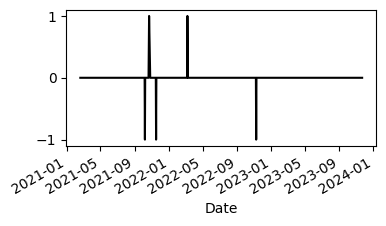

In [298]:
# Plot the positions
plt.figure(figsize = (4,2))
ndf2.iloc[0:]['Position'].plot(color = 'k', label= 'Position')

0.0


<ipython-input-299-0c47bfabd1dc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf2['Trade'] = ndf2['Position']


<Axes: xlabel='Date'>

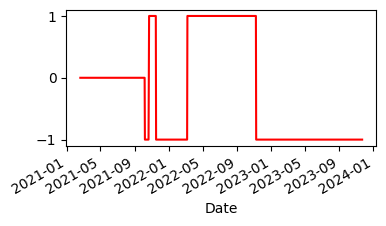

In [299]:
plt.figure(figsize = (4,2))
ndf2['Trade'] = ndf2['Position']
prevrow = ndf2.iloc[0]
print(prevrow['Position'])
for index, row in ndf2.iloc[1:].iterrows():
  if row['Trade']==0:
    if prevrow['Trade']!=0:
      ndf2.at[index,'Trade']=prevrow['Trade']
      row['Trade']=prevrow['Trade']
  prevrow=row
ndf2.iloc[0:]['Trade'].plot(color = 'r', label= 'Trade')

<ipython-input-300-62bf88f31097>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf2['Returns']=1.0


0.0


<Axes: xlabel='Date'>

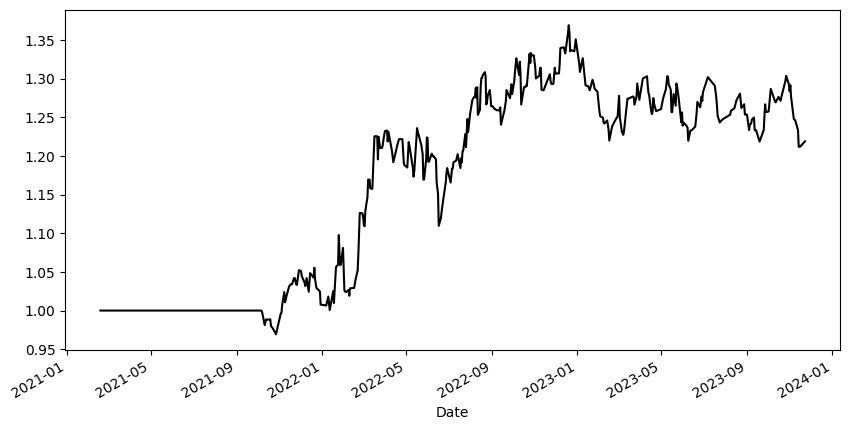

In [300]:
ndf2['Returns']=1.0
print(ndf2.iloc[1]['Trade'])

ndf2=computereturns(ndf2,0.001)
plt.figure(figsize = (10,5))
ndf2['Returns'].plot(color = 'k', label= 'Returns')

In [301]:
print("Final portfolio return:")
print(ndf2['Returns'].tail(1))

Final portfolio return:
Date
2023-11-23    1.21892
Name: Returns, dtype: float64


With this alternative approach of incorporating NEAT forecasts into the trading system, it performs rather well in terms of returns, and outperforms the original approach of simply using NEAT forecast values in the fast & slow SMAs rolling windows.

# Section 3

### BENCHMARK MODEL: ARIMA

In [77]:
!pip install rpy2
%load_ext rpy2.ipython

The following library chunk takes about 14 mins to run.

In [78]:
%%R
library(dplyr)
library(ggplot2)
install.packages("xts")
library(xts)
install.packages("forecast")
library(forecast)
install.packages("caret")
library(caret)

Attaching package: ‘dplyr’



    filter, lag



    intersect, setdiff, setequal, union


(as ‘lib’ is unspecified)














	‘/tmp/RtmplljwWi/downloaded_packages’


Attaching package: ‘zoo’



    as.Date, as.Date.numeric


######################### Warning from 'xts' package ##########################
#                                                                             #
# The dplyr lag() function breaks how base R's lag() function is supposed to  #
# work, which breaks lag(my_xts). Calls to lag(my_xts) that you type or       #
# source() into this session won't work correctly.                            #
#                                                                             #
# Use stats::lag() to make sure you're not using dplyr::lag(), or you can add #
# conflictRules('dplyr', exclude = 'lag') to your .Rprofile to stop           #
# dplyr from breaking base R's lag() function.                                #
#                                                

Preprocess the data to fit ARIMA model on the train set

In [302]:
df2 = df.reset_index()
df2

Date   Open   High    Low  Close  Adj_Close  Volume   Fast_SMA  \
0    2000-01-03   7.75   7.75   7.75   7.75   5.523126       0   7.750000   
1    2000-01-04   7.75   7.75   7.75   7.75   5.523126       0   7.750000   
2    2000-01-05   7.65   7.65   7.65   7.65   5.451860    2663   7.716667   
3    2000-01-06   7.65   7.65   7.65   7.65   5.451860       0   7.700000   
4    2000-01-07   7.65   7.65   7.65   7.65   5.451860       0   7.690000   
...         ...    ...    ...    ...    ...        ...     ...        ...   
4453 2020-12-04  14.51  14.52  14.51  14.52  14.299597    1554  13.722857   
4454 2020-12-07  14.70  14.70  14.70  14.70  14.476863      45  13.741429   
4455 2020-12-09  14.81  14.81  14.81  14.81  14.585195     154  13.762286   
4456 2020-12-10  14.84  14.84  14.83  14.83  14.604890    1454  13.782714   
4457 2020-12-14  14.90  14.90  14.90  14.90  14.673828     138  13.807714   

       Slow_SMA  Signal  Position  Trade   Returns  
0      7.750000     0.0       0.0    0.0  1.000000  
1      7.750000     0.0       0.0    0.0  1.000000  
2      7.716667     0.0       0.0    0.0  1.000000  
3      7.700000     0.0       0.0    0.0  1.000000  
4      7.690000     0.0       0.0    0.0  1.000000  
...         ...     ...       ...    ...       ...  
4453  13.493400     1.0       0.0    1.0  2.621764  
4454  13.525200     1.0       0.0    1.0  2.654265  
4455  13.558300     1.0       0.0    1.0  2.674127  
4456  13.591600     1.0       0.0    1.0  2.677738  
4457  13.620600     1.0       0.0    1.0  2.690378  

[4458 rows x 13 columns]

In [303]:
df2.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj_Close           float64
Volume                int64
Fast_SMA            float64
Slow_SMA            float64
Signal              float64
Position            float64
Trade               float64
Returns             float64
dtype: object

In [304]:
%%R -i df2
df2 = select(df2, Date, Close)
df2$Date = as.Date(df2$Date, format = "%Y-%m-%d")

/usr/local/lib/python3.10/dist-packages/rpy2/robjects/pandas2ri.py:55: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():


In [305]:
%%R
df2[1:10,]

        Date Close
0 2000-01-03  7.75
1 2000-01-04  7.75
2 2000-01-05  7.65
3 2000-01-06  7.65
4 2000-01-07  7.65
5 2000-01-10  7.75
6 2000-01-11  7.85
7 2000-01-12  7.85
8 2000-01-13  7.75
9 2000-01-14  7.75


Make training set a time series object

In [306]:
%%R
df2_xts = xts(df2$Close, order.by = df2$Date)
class(df2_xts)

[1] "xts" "zoo"


We use the Arima() function in R to find the order of the ARIMA model. The order is represented by ARIMA(p, d, q) where p represents the AR order, d represents the number of differences needed to make the data stationary, and q represents the MA order.  
First we use ndiffs() to find out how many times the data needs to be differenced in order to be stationary. The result of ndiffs() tells us the order of the d component.

In [307]:
%%R
ndiffs(df2_xts)

[1] 1


The result tells us that d = 1. This means that the data needs to be differenced once to be stationary.  
Next, we use some trial & error to find the best orders for the AR (p) and MA (q) components. We find the combination that gives the lowest RMSE, which will give us the best fit ARIMA model.

In [312]:
%%R
arima_model = Arima(df2_xts, order=c(2,1,1))
accuracy(arima_model)

                      ME       RMSE        MAE         MPE      MAPE     MASE
Training set 0.001596962 0.09995501 0.06108678 0.007130364 0.7946256 1.006982
                     ACF1
Training set 1.986183e-07


After some trial and error, the model that gives the lowest RMSE is ARIMA(2,1,1).

The following plots show the residuals of the ARIMA(2,1,1) model. It can be seen from the residuals plot that a lot of the residuals is white noise, but there are still some components of residuals that contain significant information. This can be seen in the ACF plot, where some lines lie outside of the dotted blue lines. The dotted blue lines delineate the boundary between white noise vs. significant information. Hence, the lines that lie outside the boundary of the blue lines mean that there is some information that the linear ARIMA model could not capture.


	Ljung-Box test

data:  Residuals from ARIMA(2,1,1)
Q* = 33.388, df = 7, p-value = 2.241e-05

Model df: 3.   Total lags used: 10



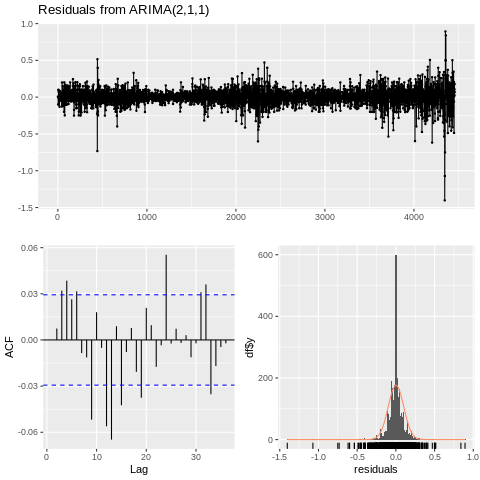

In [313]:
%%R
checkresiduals(arima_model)

Now that we have determined the order of the ARIMA model, we will use this order to forecast the test set. The ARIMA(2,1,1) model will be fitted against a rolling window of 30 historical data points to generate a one-step ahead forecast.

In [90]:
from statsmodels.tsa.arima.model import ARIMA

The following chunk takes about 2 mins to run.

In [ ]:
# Make list of forecast values
fc_vals = []

# Obtain forecast values of test set over a 30-day sliding window for forecasting
for i in range(len(test_df)-30):
  start, end = i, i+30
  hist_window = pd.DataFrame(test_df['Close'][start:end], columns=['Close'])

  # Difference the values to make stationary
  hist_window['Close_diff'] = hist_window['Close'].diff()
  hist_window.dropna(inplace=True)

  # Fit ARIMA(2,1,1) model
  order = (2, 1, 1)
  arima_model = ARIMA(hist_window['Close_diff'], order=order)
  fit = arima_model.fit()

  # Forecast one time step ahead
  fc_diff = np.asarray(fit.forecast())[0]

  # Undifference the forecasted value
  last_obs = hist_window['Close'].iloc[-1]
  print(last_obs, fc_diff)
  fc = last_obs + fc_diff

  fc_vals.append(fc)

In [315]:
fc_vals

[15.463749659019813,
 15.490649036277956,
 15.190222696718845,
 15.310739132908985,
 15.187289232467771,
 15.022985246031515,
 14.865401904347086,
 14.421273449898846,
 14.421439143557729,
 14.511739018992174,
 14.437824022963305,
 14.894637759007118,
 15.981963916251143,
 15.415615873816218,
 15.311949766057621,
 14.839629406377945,
 15.152652863097419,
 15.526082515056626,
 15.210894232640197,
 15.299414365687142,
 15.331290743789339,
 15.418592401740495,
 15.802628317855609,
 15.690984965653408,
 15.713782227875923,
 15.95351767600302,
 16.283182024102818,
 16.227988922736433,
 16.263869208134558,
 16.127685087316273,
 16.267861752719416,
 16.58220023337326,
 16.35491880237991,
 16.28296950856906,
 16.61202573167184,
 16.512295326658446,
 16.54341809684651,
 16.548306738346742,
 16.539710653085045,
 16.529835811753244,
 16.410439484735644,
 16.30482459315689,
 16.33805385630656,
 16.381881695962406,
 16.39575119766632,
 16.388331315881945,
 16.620836601995197,
 16.665170130078728,
 

In [316]:
calculate_rmse(test_df['Close'][30:].values, fc_vals)

0.23907497263959934

### TRADING WITH ARIMA FORECAST

In [317]:
# Start with clean copy of test_df
train_df, test_df = train_test_split(stock_df, test_size=0.1, shuffle=False) # Split train and test sets, 90% - 10%
test_df

Open       High        Low      Close  Adj_Close  Volume
Date                                                                     
2020-12-15  14.500000  14.500000  14.500000  14.500000  14.279900    1526
2020-12-16  14.500000  14.500000  14.500000  14.500000  14.279900     436
2020-12-17  14.690000  14.900000  14.690000  14.900000  14.673828    6268
2020-12-18  14.900000  14.900000  14.900000  14.900000  14.673828     793
2020-12-21  14.800000  14.800000  14.800000  14.800000  14.575345      89
...               ...        ...        ...        ...        ...     ...
2023-11-09  18.260000  18.260000  18.260000  18.260000  18.260000      35
2023-11-13  18.450001  18.450001  18.450001  18.450001  18.450001     105
2023-11-14  18.770000  18.770000  18.770000  18.770000  18.770000    2580
2023-11-16  18.770000  18.770000  18.770000  18.770000  18.770000    2005
2023-11-23  18.660000  18.660000  18.660000  18.660000  18.660000    1519

[496 rows x 6 columns]

Similar to the process explained for the NEAT model, we create 70-1=69 and 100-1=99 day fast and slow SMAs.

In [318]:
# create 70 days simple moving average column
test_df['Fast_SMA'] = test_df['Close'].rolling(window = 69, min_periods = 1).mean()
# Create 100 days simple moving average column
test_df['Slow_SMA'] = test_df['Close'].rolling(window=99, min_periods=1).mean()
test_df

Open       High        Low      Close  Adj_Close  Volume  \
Date                                                                        
2020-12-15  14.500000  14.500000  14.500000  14.500000  14.279900    1526   
2020-12-16  14.500000  14.500000  14.500000  14.500000  14.279900     436   
2020-12-17  14.690000  14.900000  14.690000  14.900000  14.673828    6268   
2020-12-18  14.900000  14.900000  14.900000  14.900000  14.673828     793   
2020-12-21  14.800000  14.800000  14.800000  14.800000  14.575345      89   
...               ...        ...        ...        ...        ...     ...   
2023-11-09  18.260000  18.260000  18.260000  18.260000  18.260000      35   
2023-11-13  18.450001  18.450001  18.450001  18.450001  18.450001     105   
2023-11-14  18.770000  18.770000  18.770000  18.770000  18.770000    2580   
2023-11-16  18.770000  18.770000  18.770000  18.770000  18.770000    2005   
2023-11-23  18.660000  18.660000  18.660000  18.660000  18.660000    1519   

             Fast_SMA   Slow_SMA  
Date                              
2020-12-15  14.500000  14.500000  
2020-12-16  14.500000  14.500000  
2020-12-17  14.633333  14.633333  
2020-12-18  14.700000  14.700000  
2020-12-21  14.720000  14.720000  
...               ...        ...  
2023-11-09  18.119275  18.097778  
2023-11-13  18.122319  18.098283  
2023-11-14  18.130000  18.099091  
2023-11-16  18.142609  18.099293  
2023-11-23  18.150580  18.099091  

[496 rows x 8 columns]

In [319]:
# remove the first 30 rows of test_df because forecasts only start from the 31st row
adf = test_df.iloc[30:]

In [320]:
# append ARIMA forecasts
adf['arima_forecasts'] = fc_vals
adf

<ipython-input-320-7ef95d4dd8ea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adf['arima_forecasts'] = fc_vals


Open       High        Low      Close  Adj_Close  Volume  \
Date                                                                        
2021-02-18  15.450000  15.460000  15.450000  15.460000  15.225328    3295   
2021-02-19  15.170000  15.170000  15.170000  15.170000  14.939730     405   
2021-02-22  15.300000  15.300000  15.300000  15.300000  15.067757     944   
2021-02-23  15.160000  15.160000  15.160000  15.160000  14.929881     503   
2021-02-24  15.000000  15.000000  15.000000  15.000000  14.772310     312   
...               ...        ...        ...        ...        ...     ...   
2023-11-09  18.260000  18.260000  18.260000  18.260000  18.260000      35   
2023-11-13  18.450001  18.450001  18.450001  18.450001  18.450001     105   
2023-11-14  18.770000  18.770000  18.770000  18.770000  18.770000    2580   
2023-11-16  18.770000  18.770000  18.770000  18.770000  18.770000    2005   
2023-11-23  18.660000  18.660000  18.660000  18.660000  18.660000    1519   

             Fast_SMA   Slow_SMA  arima_forecasts  
Date                                               
2021-02-18  15.058387  15.058387        15.463750  
2021-02-19  15.061875  15.061875        15.490649  
2021-02-22  15.069091  15.069091        15.190223  
2021-02-23  15.071765  15.071765        15.310739  
2021-02-24  15.069714  15.069714        15.187289  
...               ...        ...              ...  
2023-11-09  18.119275  18.097778        18.196970  
2023-11-13  18.122319  18.098283        18.221564  
2023-11-14  18.130000  18.099091        18.607114  
2023-11-16  18.142609  18.099293        18.941612  
2023-11-23  18.150580  18.099091        18.887283  

[466 rows x 9 columns]

In [321]:
adf['Fast_SMA_withfc'] = ((adf['Fast_SMA']*69) + adf['arima_forecasts'])/70
adf['Slow_SMA_withfc'] = ((adf['Slow_SMA']*99) + adf['arima_forecasts'])/100
adf.head(3)

<ipython-input-321-9086623f19de>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adf['Fast_SMA_withfc'] = ((adf['Fast_SMA']*69) + adf['arima_forecasts'])/70
<ipython-input-321-9086623f19de>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adf['Slow_SMA_withfc'] = ((adf['Slow_SMA']*99) + adf['arima_forecasts'])/100


Open   High    Low  Close  Adj_Close  Volume   Fast_SMA  \
Date                                                                   
2021-02-18  15.45  15.46  15.45  15.46  15.225328    3295  15.058387   
2021-02-19  15.17  15.17  15.17  15.17  14.939730     405  15.061875   
2021-02-22  15.30  15.30  15.30  15.30  15.067757     944  15.069091   

             Slow_SMA  arima_forecasts  Fast_SMA_withfc  Slow_SMA_withfc  
Date                                                                      
2021-02-18  15.058387        15.463750        15.064178        15.062441  
2021-02-19  15.061875        15.490649        15.068000        15.066163  
2021-02-22  15.069091        15.190223        15.070821        15.070302

In [322]:
adf['Signal'] = 0.0
adf['Signal'] = np.where(adf['Fast_SMA_withfc'] > adf['Slow_SMA_withfc'], 1.0, 0.0)

adf['Position'] = adf['Signal'].diff()
# Need to set the first row of Position to 0. Otherwise it is nan from diff function.
adf['Position'].iloc[0]=0

<ipython-input-322-2ae10da67711>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adf['Signal'] = 0.0
<ipython-input-322-2ae10da67711>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adf['Signal'] = np.where(adf['Fast_SMA_withfc'] > adf['Slow_SMA_withfc'], 1.0, 0.0)
<ipython-input-322-2ae10da67711>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

In [323]:
adf[adf['Position'] != 0.0]

Open       High        Low      Close  Adj_Close  Volume  \
Date                                                                        
2021-02-25  14.900000  14.900000  14.900000  14.900000  14.673828     697   
2021-03-16  15.350000  15.350000  15.350000  15.350000  15.116998    2605   
2021-03-19  15.150000  15.150000  15.150000  15.150000  14.920033     748   
2021-03-22  15.500000  15.500000  15.500000  15.500000  15.264720     300   
2022-04-05  16.500000  16.500000  16.309999  16.309999  16.174906     171   
2022-08-24  17.389999  17.389999  16.950001  16.950001  16.809607   10829   
2023-09-07  18.370001  18.370001  18.370001  18.370001  18.370001    1999   
2023-11-03  17.830000  17.830000  17.830000  17.830000  17.830000     837   

             Fast_SMA   Slow_SMA  arima_forecasts  Fast_SMA_withfc  \
Date                                                                 
2021-02-25  15.065000  15.065000        15.022985        15.064400   
2021-03-16  15.026046  15.026046        15.981964        15.039702   
2021-03-19  15.037826  15.037826        14.839629        15.034995   
2021-03-22  15.047660  15.047660        15.152653        15.049159   
2022-04-05  17.214203  17.215353        16.497691        17.203967   
2022-08-24  16.246232  16.251010        17.557117        16.264959   
2023-09-07  18.082609  18.088485        18.437916        18.087685   
2023-11-03  18.105942  18.097071        17.589807        18.098569   

            Slow_SMA_withfc  Signal  Position  
Date                                           
2021-02-25        15.064580     0.0      -1.0  
2021-03-16        15.035606     1.0       1.0  
2021-03-19        15.035844     0.0      -1.0  
2021-03-22        15.048709     1.0       1.0  
2022-04-05        17.208177     0.0      -1.0  
2022-08-24        16.264071     1.0       1.0  
2023-09-07        18.091979     0.0      -1.0  
2023-11-03        18.091998     1.0       1.0

<Axes: xlabel='Date'>

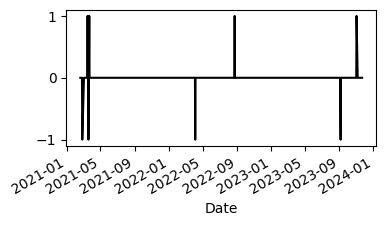

In [324]:
# Plot the positions
plt.figure(figsize = (4,2))
adf.iloc[0:]['Position'].plot(color = 'k', label= 'Position')

0.0


<ipython-input-325-54da0cc0f940>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adf['Trade'] = adf['Position']


<Axes: xlabel='Date'>

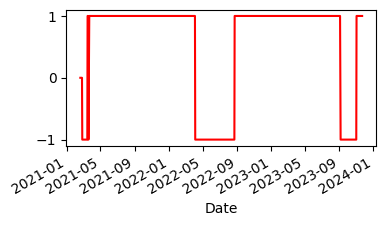

In [325]:
plt.figure(figsize = (4,2))
adf['Trade'] = adf['Position']
prevrow = adf.iloc[0]
print(prevrow['Position'])
for index, row in adf.iloc[1:].iterrows():
  if row['Trade']==0:
    if prevrow['Trade']!=0:
      adf.at[index,'Trade']=prevrow['Trade']
      row['Trade']=prevrow['Trade']
  prevrow=row
adf.iloc[0:]['Trade'].plot(color = 'r', label= 'Trade')

<ipython-input-326-d510f18a857d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adf['Returns']=1.0


0.0


<Axes: xlabel='Date'>

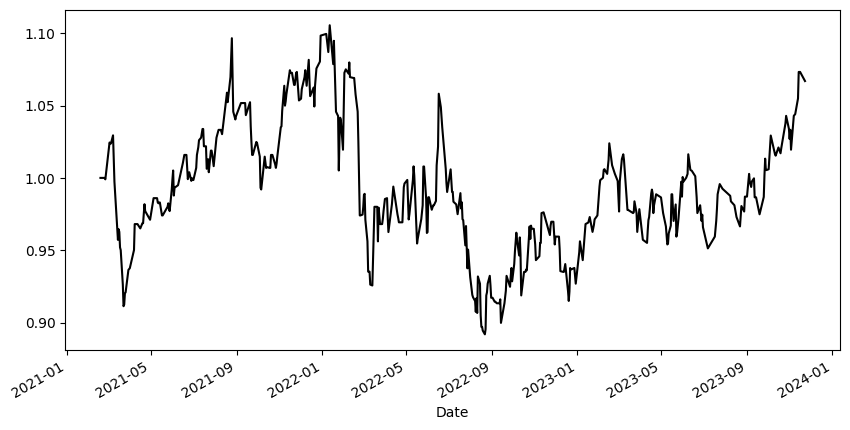

In [326]:
adf['Returns']=1.0
print(adf.iloc[1]['Trade'])

adf=computereturns(adf,0.001)
plt.figure(figsize = (10,5))
adf['Returns'].plot(color = 'k', label= 'Returns')

In [327]:
print("Final portfolio return:")
print(adf['Returns'].tail(1))

Final portfolio return:
Date
2023-11-23    1.066945
Name: Returns, dtype: float64


### ALTERNATIVE APPROACH TO TRADING WITH ARIMA FORECAST

Here, we try the same approach used in "Alternative approach to trading with NEAT forecast", but using the ARIMA forecast.

In [338]:
# Start with clean copy of test_df
train_df, test_df = train_test_split(stock_df, test_size=0.1, shuffle=False) # Split train and test sets, 90% - 10%
test_df

Open       High        Low      Close  Adj_Close  Volume
Date                                                                     
2020-12-15  14.500000  14.500000  14.500000  14.500000  14.279900    1526
2020-12-16  14.500000  14.500000  14.500000  14.500000  14.279900     436
2020-12-17  14.690000  14.900000  14.690000  14.900000  14.673828    6268
2020-12-18  14.900000  14.900000  14.900000  14.900000  14.673828     793
2020-12-21  14.800000  14.800000  14.800000  14.800000  14.575345      89
...               ...        ...        ...        ...        ...     ...
2023-11-09  18.260000  18.260000  18.260000  18.260000  18.260000      35
2023-11-13  18.450001  18.450001  18.450001  18.450001  18.450001     105
2023-11-14  18.770000  18.770000  18.770000  18.770000  18.770000    2580
2023-11-16  18.770000  18.770000  18.770000  18.770000  18.770000    2005
2023-11-23  18.660000  18.660000  18.660000  18.660000  18.660000    1519

[496 rows x 6 columns]

In [339]:
# create 70 days simple moving average column
test_df['Fast_SMA'] = test_df['Close'].rolling(window = 70, min_periods = 1).mean()
# Create 100 days simple moving average column
test_df['Slow_SMA'] = test_df['Close'].rolling(window=100, min_periods=1).mean()
test_df

Open       High        Low      Close  Adj_Close  Volume  \
Date                                                                        
2020-12-15  14.500000  14.500000  14.500000  14.500000  14.279900    1526   
2020-12-16  14.500000  14.500000  14.500000  14.500000  14.279900     436   
2020-12-17  14.690000  14.900000  14.690000  14.900000  14.673828    6268   
2020-12-18  14.900000  14.900000  14.900000  14.900000  14.673828     793   
2020-12-21  14.800000  14.800000  14.800000  14.800000  14.575345      89   
...               ...        ...        ...        ...        ...     ...   
2023-11-09  18.260000  18.260000  18.260000  18.260000  18.260000      35   
2023-11-13  18.450001  18.450001  18.450001  18.450001  18.450001     105   
2023-11-14  18.770000  18.770000  18.770000  18.770000  18.770000    2580   
2023-11-16  18.770000  18.770000  18.770000  18.770000  18.770000    2005   
2023-11-23  18.660000  18.660000  18.660000  18.660000  18.660000    1519   

             Fast_SMA   Slow_SMA  
Date                              
2020-12-15  14.500000  14.500000  
2020-12-16  14.500000  14.500000  
2020-12-17  14.633333  14.633333  
2020-12-18  14.700000  14.700000  
2020-12-21  14.720000  14.720000  
...               ...        ...  
2023-11-09  18.115286  18.097000  
2023-11-13  18.124000  18.101300  
2023-11-14  18.131571  18.105000  
2023-11-16  18.139143  18.105800  
2023-11-23  18.150000  18.104900  

[496 rows x 8 columns]

In [340]:
# remove the first 30 rows because forecasts only start from the 31st row
adf2 = test_df.iloc[30:]
# append ARIMA forecasts
adf2['arima_forecasts'] = fc_vals
adf2

<ipython-input-340-ddb1409a2a67>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adf2['arima_forecasts'] = fc_vals


Open       High        Low      Close  Adj_Close  Volume  \
Date                                                                        
2021-02-18  15.450000  15.460000  15.450000  15.460000  15.225328    3295   
2021-02-19  15.170000  15.170000  15.170000  15.170000  14.939730     405   
2021-02-22  15.300000  15.300000  15.300000  15.300000  15.067757     944   
2021-02-23  15.160000  15.160000  15.160000  15.160000  14.929881     503   
2021-02-24  15.000000  15.000000  15.000000  15.000000  14.772310     312   
...               ...        ...        ...        ...        ...     ...   
2023-11-09  18.260000  18.260000  18.260000  18.260000  18.260000      35   
2023-11-13  18.450001  18.450001  18.450001  18.450001  18.450001     105   
2023-11-14  18.770000  18.770000  18.770000  18.770000  18.770000    2580   
2023-11-16  18.770000  18.770000  18.770000  18.770000  18.770000    2005   
2023-11-23  18.660000  18.660000  18.660000  18.660000  18.660000    1519   

             Fast_SMA   Slow_SMA  arima_forecasts  
Date                                               
2021-02-18  15.058387  15.058387        15.463750  
2021-02-19  15.061875  15.061875        15.490649  
2021-02-22  15.069091  15.069091        15.190223  
2021-02-23  15.071765  15.071765        15.310739  
2021-02-24  15.069714  15.069714        15.187289  
...               ...        ...              ...  
2023-11-09  18.115286  18.097000        18.196970  
2023-11-13  18.124000  18.101300        18.221564  
2023-11-14  18.131571  18.105000        18.607114  
2023-11-16  18.139143  18.105800        18.941612  
2023-11-23  18.150000  18.104900        18.887283  

[466 rows x 9 columns]

In [341]:
adf2['Signal'] = 0.0
adf2['Signal'] = np.where(adf2['arima_forecasts'] > adf2['Fast_SMA'], 1.0, 0.0)
adf2['Position'] = adf2['Signal'].diff()
# Need to set the first row of Position to 0. Otherwise it is nan from diff function.
adf2['Position'].iloc[0]=0

adf2.head()

<ipython-input-341-8628cec95de5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adf2['Signal'] = 0.0
<ipython-input-341-8628cec95de5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adf2['Signal'] = np.where(adf2['arima_forecasts'] > adf2['Fast_SMA'], 1.0, 0.0)
<ipython-input-341-8628cec95de5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

Open   High    Low  Close  Adj_Close  Volume   Fast_SMA  \
Date                                                                   
2021-02-18  15.45  15.46  15.45  15.46  15.225328    3295  15.058387   
2021-02-19  15.17  15.17  15.17  15.17  14.939730     405  15.061875   
2021-02-22  15.30  15.30  15.30  15.30  15.067757     944  15.069091   
2021-02-23  15.16  15.16  15.16  15.16  14.929881     503  15.071765   
2021-02-24  15.00  15.00  15.00  15.00  14.772310     312  15.069714   

             Slow_SMA  arima_forecasts  Signal  Position  
Date                                                      
2021-02-18  15.058387        15.463750     1.0       0.0  
2021-02-19  15.061875        15.490649     1.0       0.0  
2021-02-22  15.069091        15.190223     1.0       0.0  
2021-02-23  15.071765        15.310739     1.0       0.0  
2021-02-24  15.069714        15.187289     1.0       0.0

<Axes: xlabel='Date'>

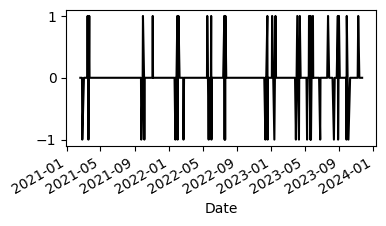

In [342]:
# Plot the positions
plt.figure(figsize = (4,2))
adf2.iloc[0:]['Position'].plot(color = 'k', label= 'Position')

0.0


<ipython-input-343-b8a0d1f3526d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adf2['Trade'] = adf2['Position']


<Axes: xlabel='Date'>

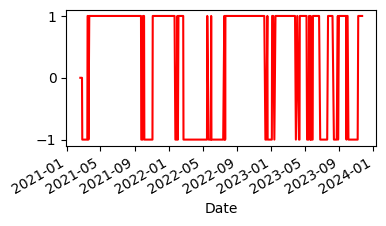

In [343]:
plt.figure(figsize = (4,2))
adf2['Trade'] = adf2['Position']
prevrow = adf2.iloc[0]
print(prevrow['Position'])
for index, row in adf2.iloc[1:].iterrows():
  if row['Trade']==0:
    if prevrow['Trade']!=0:
      adf2.at[index,'Trade']=prevrow['Trade']
      row['Trade']=prevrow['Trade']
  prevrow=row
adf2.iloc[0:]['Trade'].plot(color = 'r', label= 'Trade')

<ipython-input-344-36bd40a1cb21>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adf2['Returns']=1.0


0.0


<Axes: xlabel='Date'>

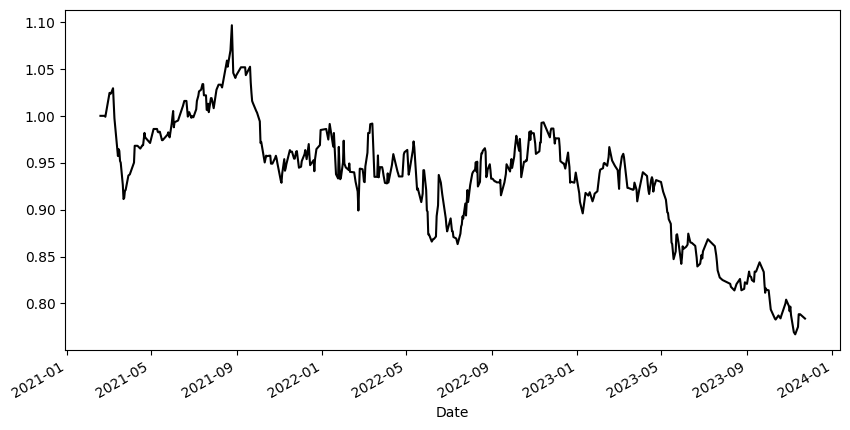

In [344]:
adf2['Returns']=1.0
print(adf2.iloc[1]['Trade'])

adf2=computereturns(adf2,0.001)
plt.figure(figsize = (10,5))
adf2['Returns'].plot(color = 'k', label= 'Returns')

In [345]:
print("Final portfolio return:")
print(adf2['Returns'].tail(1))

Final portfolio return:
Date
2023-11-23    0.783938
Name: Returns, dtype: float64


Unlike the NEAT forecast, this alternative approach for ARIMA forecasts does very poorly.

# Section 4

### BASELINE: WITHOUT PREDICTION

In [347]:
# Start with clean copy of test_df
train_df, test_df = train_test_split(stock_df, test_size=0.1, shuffle=False) # Split train and test sets, 90% - 10%
test_df

Open       High        Low      Close  Adj_Close  Volume
Date                                                                     
2020-12-15  14.500000  14.500000  14.500000  14.500000  14.279900    1526
2020-12-16  14.500000  14.500000  14.500000  14.500000  14.279900     436
2020-12-17  14.690000  14.900000  14.690000  14.900000  14.673828    6268
2020-12-18  14.900000  14.900000  14.900000  14.900000  14.673828     793
2020-12-21  14.800000  14.800000  14.800000  14.800000  14.575345      89
...               ...        ...        ...        ...        ...     ...
2023-11-09  18.260000  18.260000  18.260000  18.260000  18.260000      35
2023-11-13  18.450001  18.450001  18.450001  18.450001  18.450001     105
2023-11-14  18.770000  18.770000  18.770000  18.770000  18.770000    2580
2023-11-16  18.770000  18.770000  18.770000  18.770000  18.770000    2005
2023-11-23  18.660000  18.660000  18.660000  18.660000  18.660000    1519

[496 rows x 6 columns]

In [348]:
# create 70 days simple moving average column
test_df['Fast_SMA'] = test_df['Close'].rolling(window = 70, min_periods = 1).mean()
# Create 100 days simple moving average column
test_df['Slow_SMA'] = test_df['Close'].rolling(window=100, min_periods=1).mean()
test_df

Open       High        Low      Close  Adj_Close  Volume  \
Date                                                                        
2020-12-15  14.500000  14.500000  14.500000  14.500000  14.279900    1526   
2020-12-16  14.500000  14.500000  14.500000  14.500000  14.279900     436   
2020-12-17  14.690000  14.900000  14.690000  14.900000  14.673828    6268   
2020-12-18  14.900000  14.900000  14.900000  14.900000  14.673828     793   
2020-12-21  14.800000  14.800000  14.800000  14.800000  14.575345      89   
...               ...        ...        ...        ...        ...     ...   
2023-11-09  18.260000  18.260000  18.260000  18.260000  18.260000      35   
2023-11-13  18.450001  18.450001  18.450001  18.450001  18.450001     105   
2023-11-14  18.770000  18.770000  18.770000  18.770000  18.770000    2580   
2023-11-16  18.770000  18.770000  18.770000  18.770000  18.770000    2005   
2023-11-23  18.660000  18.660000  18.660000  18.660000  18.660000    1519   

             Fast_SMA   Slow_SMA  
Date                              
2020-12-15  14.500000  14.500000  
2020-12-16  14.500000  14.500000  
2020-12-17  14.633333  14.633333  
2020-12-18  14.700000  14.700000  
2020-12-21  14.720000  14.720000  
...               ...        ...  
2023-11-09  18.115286  18.097000  
2023-11-13  18.124000  18.101300  
2023-11-14  18.131571  18.105000  
2023-11-16  18.139143  18.105800  
2023-11-23  18.150000  18.104900  

[496 rows x 8 columns]

In [349]:
# remove the first 30 rows of test_df for comparison with the NEAT and ARIMA forecasts
test_df = test_df.iloc[30:]

In [350]:
test_df['Signal'] = 0.0
test_df['Signal'] = np.where(test_df['Fast_SMA'] > test_df['Slow_SMA'], 1.0, 0.0)

<ipython-input-350-e011a47e2d67>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Signal'] = 0.0
<ipython-input-350-e011a47e2d67>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Signal'] = np.where(test_df['Fast_SMA'] > test_df['Slow_SMA'], 1.0, 0.0)


In [351]:
test_df['Position'] = test_df['Signal'].diff()
# Need to set the first row of Position to 0. Otherwise it is nan from diff function.
test_df['Position'].iloc[0]=0

test_df.head()

<ipython-input-351-c8b2630bc67a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Position'] = test_df['Signal'].diff()
<ipython-input-351-c8b2630bc67a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Position'].iloc[0]=0


Open   High    Low  Close  Adj_Close  Volume   Fast_SMA  \
Date                                                                   
2021-02-18  15.45  15.46  15.45  15.46  15.225328    3295  15.058387   
2021-02-19  15.17  15.17  15.17  15.17  14.939730     405  15.061875   
2021-02-22  15.30  15.30  15.30  15.30  15.067757     944  15.069091   
2021-02-23  15.16  15.16  15.16  15.16  14.929881     503  15.071765   
2021-02-24  15.00  15.00  15.00  15.00  14.772310     312  15.069714   

             Slow_SMA  Signal  Position  
Date                                     
2021-02-18  15.058387     0.0       0.0  
2021-02-19  15.061875     0.0       0.0  
2021-02-22  15.069091     0.0       0.0  
2021-02-23  15.071765     0.0       0.0  
2021-02-24  15.069714     0.0       0.0

In [352]:
test_df[test_df['Position'] != 0.0]

Open       High        Low      Close  Adj_Close  Volume  \
Date                                                                        
2021-05-18  16.389999  16.410000  16.250000  16.299999  16.052576    7898   
2022-04-06  16.480000  16.480000  16.480000  16.480000  16.343498     956   
2022-08-26  17.100000  17.100000  17.100000  17.100000  16.958364    1410   
2023-09-08  18.299999  18.299999  18.299999  18.299999  18.299999     155   
2023-11-07  18.150000  18.240000  18.150000  18.240000  18.240000      50   

             Fast_SMA   Slow_SMA  Signal  Position  
Date                                                
2021-05-18  15.405714  15.392958     1.0       1.0  
2022-04-06  17.203714  17.208000     0.0      -1.0  
2022-08-26  16.268857  16.254400     1.0       1.0  
2023-09-08  18.085714  18.090600     0.0      -1.0  
2023-11-07  18.107857  18.098500     1.0       1.0

<Axes: xlabel='Date'>

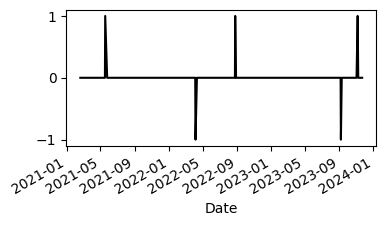

In [353]:
# Plot the positions
plt.figure(figsize = (4,2))
test_df.iloc[0:]['Position'].plot(color = 'k', label= 'Position')

0.0


<ipython-input-354-023e981a2174>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Trade'] = test_df['Position']


<Axes: xlabel='Date'>

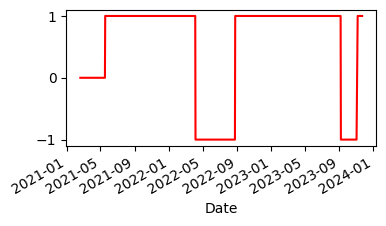

In [354]:
plt.figure(figsize = (4,2))
test_df['Trade'] = test_df['Position']
prevrow = test_df.iloc[0]
print(prevrow['Position'])
for index, row in test_df.iloc[1:].iterrows():
  if row['Trade']==0:
    if prevrow['Trade']!=0:
      test_df.at[index,'Trade']=prevrow['Trade']
      row['Trade']=prevrow['Trade']
  prevrow=row
test_df.iloc[0:]['Trade'].plot(color = 'r', label= 'Trade')

<ipython-input-355-e8cb38dc49c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Returns']=1.0


0.0


<Axes: xlabel='Date'>

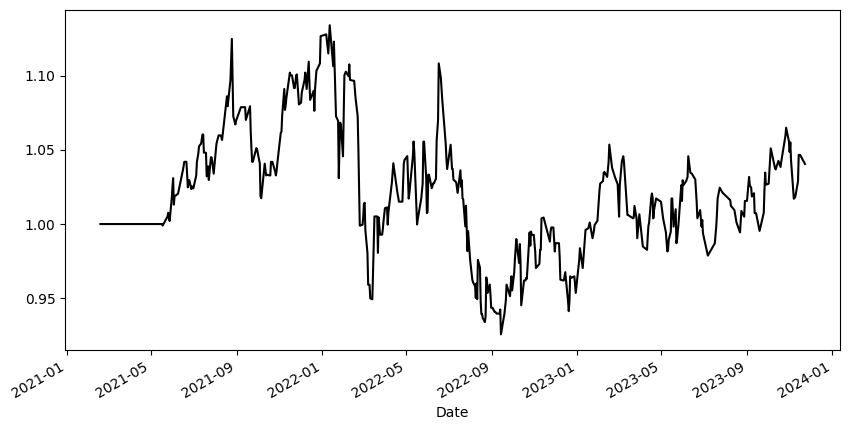

In [355]:
test_df['Returns']=1.0
print(test_df.iloc[1]['Trade'])

test_df=computereturns(test_df,0.001)
plt.figure(figsize = (10,5))
test_df['Returns'].plot(color = 'k', label= 'Returns')

In [356]:
print("Final portfolio return - without forecast:")
print(test_df['Returns'].tail(1))

Final portfolio return - without forecast:
Date
2023-11-23    1.040447
Name: Returns, dtype: float64


# Final Plot

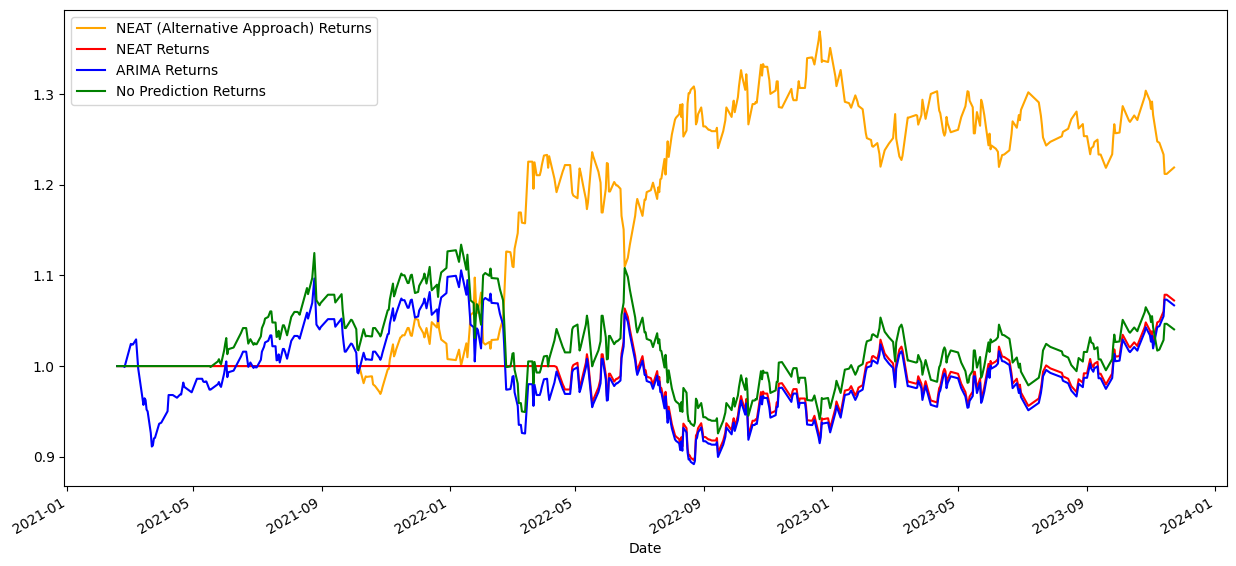

In [359]:
plt.figure(figsize = (15,7))
ndf2['Returns'].plot(color = 'orange', label= 'NEAT (Alternative Approach) Returns')
ndf['Returns'].plot(color = 'r', label= 'NEAT Returns')
adf['Returns'].plot(color = 'b', label= 'ARIMA Returns')
test_df['Returns'].plot(color = 'g', label= 'No Prediction Returns')

plt.legend()
plt.show()

# Section 5

### Analysis of Results

**Comparing RMSE of Forecasts**  
The NEAT model's RMSE was 7.5642, while the ARIMA model's RMSE was 0.2391. Evidently, the ARIMA model's forecasts are much more accurate than that of the NEAT model. This might mean that the ARIMA model could potentially produce better trading results. Next, I will analyse the final returns produced by using both NEAT and ARIMA forecasts.


**Comparing Final Returns**  
The baseline model with no prediction uses a simple moving average (SMA) crossover trading strategy, where the fast SMA is a 70-day rolling window and the slow SMA is a 100-day rolling window. These parameters were first trained on the train set, which made a return of 2.6904. For the test set, the baseline model produced a return of 1.0404.

Although the ARIMA model produced very good forecasts results, it did not generate much higher returns than the baseline, with the end return being 1.0669. One reason for this could be the lack of synergy with the existing SMA crossover strategy. With the low RMSE of the forecasts, the ARIMA model could potentially make far better returns given a different set of parameters for the fast and slow SMAs. Outside of this project, we can experiment with the ARIMA forecasts on different trading strategies, and this might produce much better results, considering the accuracy of ARIMA forecasts. Furthermore, a key advantage is that the ARIMA model is a relatively simple and straightforward one with few parameters, and can produce fairly good results.  

The hybrid NEAT model made a higher return than the ARIMA and baseline models, with a final return of 1.0723. It is, however, only marginally better than the ARIMA model's returns. While the RMSE of forecasts of the NEAT model are far inferior to the ARIMA model's, the NEAT model's forecasts worked relatively better with the original SMA crossover strategy between fast & slow SMAs.

However, using an alternative trading approach with the NEAT forecasts, where the forecast is plotted with the fast SMA as the crossover strategy (as opposed to plotting the crossover of fast & slow SMAs), the trading model produces much higher returns of 1.2189. This shows that the NEAT forecasts work very well with the 70-day fast SMA, perhaps because the two trend lines have good synergy, producing good returns.

**Tuning Parameters**  
To improve the RMSE of the NEAT model, we can look towards tuning the parameters of the genetic algorithm. There are many parameters in the configuration of a NEAT model, but one possible strategy is to focus on the balancing the trade-off between exploration and exploitation. To make more accurate predictions, we can consider increasing exploration. For the parameters, this would mean increasing population size (pop_size) to enhance diversity, which increases the number of genomes in each generation. Increasing the number of generations (num_generations) also allows for more extensive exploration of the solution space. For this project, the weight and node mutation rates (weight_mutate_rate and node_add_prob) were set relatively low at 0.2. Increasing these 2 probabilities will increase the probability of introducing changes in connection weights and adding nodes to the neural network structure. This results in more extensive exploration.

**Linear and Non-Linear Components**  
This time series dataset likely has both linear and non-linear components. This is evidenced by the checkresiduals() plot in Section 3. As explained before, the checkresiduals() shows the residuals of the ARIMA model and how well it can fit the data. It shows how much significant information (i.e. not white noise) is left uncaptured by the ARIMA model. We can see from the plot that there is some information left uncaptured. Since ARIMA is a linear model, the significant residuals are likley non-linear in nature and cannot be modelled by the ARIMA model. In comparison, NEAT excels with non-linear data as well, hence, given improved parameters, it has the potential to produce much improved forecasts. To take a more generalisable perspective, it is common for stock price time series data to have both linear and non-linear components, which would make the ARIMA model alone less effective. The NEAT model, on the other hand, would be able to capture these non-linear components well.

### Future Research

The traditional ARIMA model is extensively used in time series forecasting as it is robust and produces consistently good results. To some degree, it is also interpretable because we can manually determine the AR and MA orders of the model through visual methods by plotting out the partial autocorrelation and autocorrelation plots. In the future, we can consider looking into a hybrid ARIMA-NEAT model, using ARIMA model the linear component of the data and NEAT to model the non-linear component of the data. We can first apply the ARIMA model, then use NEAT on the residual component of the ARIMA model.  This would provide more flexibility in dealing with various types of data sets. In 2003, Zhang proposed a hybrid ARIMA-ANN model in the paper "Time series forecasting using a hybrid ARIMA and neural network model", which produced improved results forecasting accuracy results in comparison to each standalone model. Hence, an ARIMA-NEAT model stands to be a further improvement that is especially applicable in the time series stock price domain, as it overcomes any limitations of fixed-topology neural networks for the non-linear component, and would provide more space to explore the best neural network solution for different types of data sets. This hybrid model would be more versatile and generalisable to many different datasets with linear and non-linear components, and data with evolving patterns over time.